## Importing the Libraries

In [1]:
import string 
import re
import codecs
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

## Loading the Dataset

In [3]:
# Loading english raw data

english_df = pd.read_csv("europarl-v7.bg-en.en", "ut-8", header=None, names=["English"])
english_df.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\3331171588.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  english_df = pd.read_csv("europarl-v7.bg-en.en", "ut-8", header=None, names=["English"])


,English
0,Membership of Parliament: see Minutes
1,Approval of Minutes of previous sitting: see M...
2,Membership of Parliament: see Minutes
3,Verification of credentials: see Minutes
4,Documents received: see Minutes


In [4]:
# Loading raw german data

german_df = pd.read_csv("europarl-v7.de-en.de", "utf-8", header=None, names=["German"])
german_df.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\1661770166.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  german_df = pd.read_csv("europarl-v7.de-en.de", "utf-8", header=None, names=["German"])


,German
0,Wiederaufnahme der Sitzungsperiode
1,"Ich erkläre die am Freitag, dem 17. Dezember u..."
2,"Wie Sie feststellen konnten, ist der gefürchte..."
3,Im Parlament besteht der Wunsch nach einer Aus...
4,Heute möchte ich Sie bitten - das ist auch der...


In [5]:
# Loading raw french data

french_df = pd.read_csv("europarl-v7.fr-en.fr", "utf-8", header=None, names=["French"])
french_df.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\3220914255.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  french_df = pd.read_csv("europarl-v7.fr-en.fr", "utf-8", header=None, names=["French"])


,French
0,Reprise de la session
1,Je déclare reprise la session du Parlement eur...
2,"Comme vous avez pu le constater, le grand ""bog..."
3,Vous avez souhaité un débat à ce sujet dans le...
4,"En attendant, je souhaiterais, comme un certai..."


In [6]:
# Loading raw spanish data

spanish_df = pd.read_csv("europarl-v7.es-en.es", "utf-8", header=None, names=["Spanish"])
spanish_df.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\1866780379.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  spanish_df = pd.read_csv("europarl-v7.es-en.es", "utf-8", header=None, names=["Spanish"])


,Spanish
0,Reanudación del período de sesiones
1,Declaro reanudado el período de sesiones del P...
2,"Como todos han podido comprobar, el gran ""efec..."
3,Sus Señorías han solicitado un debate sobre el...
4,"A la espera de que se produzca, de acuerdo con..."


In [7]:
#Loading raw bulgarian data

bulgarian_df = pd.read_csv("europarl-v7.bg-en.bg", "utf-8", header=None, names=['Bulgarian'])
bulgarian_df.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\780259708.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  bulgarian_df = pd.read_csv("europarl-v7.bg-en.bg", "utf-8", header=None, names=['Bulgarian'])


,Bulgarian
0,Състав на Парламента: вж. протоколи
1,Одобряване на протокола от предишното заседани...
2,Състав на Парламента: вж. протоколи
3,Проверка на пълномощията: вж. протоколи
4,Внасяне на документи: вж. протоколи


In [8]:
# Loading raw Czech data

czech_df = pd.read_csv("europarl-v7.cs-en.cs", "utf-8", header=None, names=['Czech'])
czech_df.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\3673413096.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  czech_df = pd.read_csv("europarl-v7.cs-en.cs", "utf-8", header=None, names=['Czech'])


,Czech
0,Následný postup na základě usnesení Parlamentu...
1,Předložení dokumentů: viz zápis
2,Písemná prohlášení (článek 116 jednacího řádu)...
3,Texty smluv dodané Radou: viz zápis
4,Složení Parlamentu: viz zápis


In [9]:
# Loading raw Danish data

danish_df = pd.read_csv('europarl-v7.da-en.da', "utf-8", header=None, names=['Danish'])
danish_df.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\46372014.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  danish_df = pd.read_csv('europarl-v7.da-en.da', "utf-8", header=None, names=['Danish'])


,Danish
0,Genoptagelse af sessionen
1,"Jeg erklærer Europa-Parlamentets session, der ..."
2,"Som De kan se, indfandt det store ""år 2000-pro..."
3,De har udtrykt ønske om en debat om dette emne...
4,I mellemtiden ønsker jeg - som også en del kol...


In [10]:
# Loading raw Finnish data

finnish_df = pd.read_csv('europarl-v7.fi-en.fi', "utf-8", header=None, names=['Finnish'])
finnish_df.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\1902821646.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  finnish_df = pd.read_csv('europarl-v7.fi-en.fi', "utf-8", header=None, names=['Finnish'])


,Finnish
0,Istuntokauden uudelleenavaaminen
1,Julistan perjantaina joulukuun 17. päivänä kes...
2,"Kuten olette varmaan saattaneet huomata, vuode..."
3,"Te olette esittäneet toiveen, että tästä asias..."
4,"Sillä välin toivoisin, kuten useampi kollega o..."


In [11]:
# Loading raw Hungarian data

hungarian_df = pd.read_csv('europarl-v7.hu-en.hu', 'utf-8', header=None, names=['Hungarian'])
hungarian_df.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\1694575680.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  hungarian_df = pd.read_csv('europarl-v7.hu-en.hu', 'utf-8', header=None, names=['Hungarian'])


,Hungarian
0,A Parlament állásfoglalásaival kapcsolatos tov...
1,Dokumentumok benyújtása: lásd a jegyzőkönyvet
2,Írásbeli nyilatkozatok (az Eljárási Szabályzat...
3,A megállapodások szövegeinek Tanács általi elő...
4,A Parlament tagjai: lásd a jegyzőkönyvet


In [12]:
# Loading raw Latvian data

latvian_df = pd.read_csv('europarl-v7.lv-en.lv', 'utf-8', header=None, names=['Latvian'])
latvian_df.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\3467744126.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  latvian_df = pd.read_csv('europarl-v7.lv-en.lv', 'utf-8', header=None, names=['Latvian'])


,Latvian
0,Saistībā ar Parlamenta rezolūcijām veiktie pas...
1,Dokumentu iesniegšana (sk. protokolu)
2,Rakstiskas deklarācijas (Reglamenta 116. pants...
3,Padomes nosūtītie nolīgumu teksti (sk. protokolu)
4,Parlamenta sastāvs (sk. protokolu)


In [13]:
# Loading raw Dutch data

dutch_df = pd.read_csv('europarl-v7.nl-en.nl', 'utf-8', header=None, names=['Dutch'])
dutch_df.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\600002837.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dutch_df = pd.read_csv('europarl-v7.nl-en.nl', 'utf-8', header=None, names=['Dutch'])


,Dutch
0,Hervatting van de zitting
1,Ik verklaar de zitting van het Europees Parlem...
2,"Zoals u heeft kunnen constateren, is de grote ..."
3,U heeft aangegeven dat u deze vergaderperiode ...
4,Nu wil ik graag op verzoek van een aantal coll...


In [14]:
# Loading raw Polish data

polish_df = pd.read_csv('europarl-v7.pl-en.pl', 'utf-8', header=None, names=['Polish'])
polish_df.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\4134773227.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  polish_df = pd.read_csv('europarl-v7.pl-en.pl', 'utf-8', header=None, names=['Polish'])


,Polish
0,Działania podjęte w wyniku rezolucji Parlament...
1,Składanie dokumentów: patrz protokół
2,Oświadczenia pisemne (art. 116 Regulaminu): pa...
3,Teksty porozumień przekazane przez Radę: patrz...
4,Skład Parlamentu: patrz protokół


In [15]:
# Loading raw Portuguese data

portuguese_data = pd.read_csv('europarl-v7.pt-en.pt', 'utf-8', header=None, names=['Portuguese'])
portuguese_data.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\2935169992.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  portuguese_data = pd.read_csv('europarl-v7.pt-en.pt', 'utf-8', header=None, names=['Portuguese'])


,Portuguese
0,Reinício da sessão
1,Declaro reaberta a sessão do Parlamento Europe...
2,"Como puderam constatar, o grande ""bug do ano 2..."
3,Os senhores manifestaram o desejo de se proced...
4,"Entretanto, gostaria - como também me foi pedi..."


In [16]:
# Loading raw Romanian data

romanian_df = pd.read_csv('europarl-v7.ro-en.ro', 'utf-8', header=None, names=['Romanian'])
romanian_df.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\4210573503.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  romanian_df = pd.read_csv('europarl-v7.ro-en.ro', 'utf-8', header=None, names=['Romanian'])


,Romanian
0,Componenţa Parlamentului: a se vedea procesul-...
1,Aprobarea procesului-verbal al şedinţei preced...
2,Componenţa Parlamentului: a se vedea procesul-...
3,Verificarea prerogativelor: a se vedea procesu...
4,Depunere de documente: a se vedea procesul-verbal


In [17]:
# Loading raw Slovenian data

slovenian_df = pd.read_csv('europarl-v7.sl-en.sl', 'utf-8', header=None, names=['Slovenian'])
slovenian_df.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\567232927.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  slovenian_df = pd.read_csv('europarl-v7.sl-en.sl', 'utf-8', header=None, names=['Slovenian'])


,Slovenian
0,Nadaljnje obravnavanje resolucij Parlamenta: g...
1,Predložitev dokumentov: glej zapisnik
2,Pisne izjave (člen 116): glej zapisnik
3,Posredovanje besedil sporazumov s strani Sveta...
4,Sestava Parlamenta: glej zapisnik


In [18]:
# Loading raw Swedish data

swedish_df = pd.read_csv('europarl-v7.sv-en.sv', 'utf-8', header=None, names=['Swedish'])
swedish_df.head()

R:\NLP_projects\nlpenv\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rishabh Nagar\AppData\Local\Temp\ipykernel_12920\1806321754.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  swedish_df = pd.read_csv('europarl-v7.sv-en.sv', 'utf-8', header=None, names=['Swedish'])


,Swedish
0,Återupptagande av sessionen
1,Jag förklarar Europaparlamentets session återu...
2,"Som ni kunnat konstatera ägde ""den stora år 20..."
3,Ni har begärt en debatt i ämnet under sammantr...
4,"Till dess vill jag att vi, som ett antal kolle..."


## Data Preprocessing

In [19]:
for char in string.punctuation:
    print(char, end = ' ')
translate_table = dict((ord(char), None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [20]:
# Cleaning the data for english dataset

data_eng = []
lang_eng = []

for i, line in english_df.iterrows():
    line = line['English']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_eng.append(line)
        lang_eng.append("English")

In [21]:
# Cleaning the data for german dataset

data_ger = []
lang_ger = []

for i, line in german_df.iterrows():
    line = line['German']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_ger.append(line)
        lang_ger.append("German")

In [22]:
# Cleaning the data for french dataset

data_fre = []
lang_fre = []

for i, line in french_df.iterrows():
    line = line['French']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_fre.append(line)
        lang_fre.append("French")

In [23]:
# Cleaning the data for spanish dataset

data_esp = []
lang_esp = []

for i, line in spanish_df.iterrows():
    line = line['Spanish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Spanish")

In [24]:
# Cleaning the data for Bulgarian dataset

data_bul = []
lang_bul = []

for i, line in bulgarian_df.iterrows():
    line = line['Bulgarian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Bulgarian")

In [25]:
# Cleaning the data for Czech dataset

data_czech = []
lang_czech = []

for i, line in czech_df.iterrows():
    line = line['Czech']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Czech")

In [26]:
# Cleaning the data for Danish dataset

data_dan = []
lang_dan = []

for i, line in danish_df.iterrows():
    line = line['Danish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Danish")

In [27]:
# Cleaning the data for finnish dataset

data_fin = []
lang_fin = []

for i, line in finnish_df.iterrows():
    line = line['Finnish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Finnish")

In [28]:
# Cleaning the data for Hugarian dataset

data_hung = []
lang_hung = []

for i, line in hungarian_df.iterrows():
    line = line['Hungarian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Hungarian")

In [29]:
# Cleaning the data for Latvian dataset

data_lat = []
lang_lat = []

for i, line in latvian_df.iterrows():
    line = line['Latvian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Latvian")

In [31]:
# Cleaning the data for Dutch dataset

data_dutch = []
lang_dutch = []

for i, line in dutch_df.iterrows():
    line = line['Dutch']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Dutch")

In [32]:
# Cleaning the data for Polish dataset

data_pol = []
lang_pol = []

for i, line in polish_df.iterrows():
    line = line['Polish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Polish")

In [33]:
# Cleaning the data for Portuguese dataset

data_port = []
lang_port = []

for i, line in portuguese_data.iterrows():
    line = line['Portuguese']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Portuguese")


In [34]:
# Cleaning the data for Romanian dataset

data_rom = []
lang_rom = []

for i, line in romanian_df.iterrows():
    line = line['Romanian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Romanian")

In [35]:
# Cleaning the data for Romanian dataset

data_slo = []
lang_slo = []

for i, line in slovenian_df.iterrows():
    line = line['Slovenian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Slovenian")

## Combining all the Language data into one DataFrame

In [36]:
df = pd.DataFrame({
    "Text" : data_eng+data_ger+data_fre+data_esp+data_bul+data_czech+data_dan+data_fin+data_hung+data_lat+data_dutch+data_port+data_pol+data_rom+data_slo,
    "Language" : lang_eng+lang_ger+lang_fre+lang_esp+lang_bul+lang_czech+lang_dan+lang_fin+lang_hung+lang_lat+lang_dutch+lang_port+lang_pol+lang_rom+lang_slo
})

print(df.shape)

(18740455, 2)


In [37]:
df.head()

,Text,Language
0,membership of parliament see minutes,English
1,approval of minutes of previous sitting see mi...,English
2,membership of parliament see minutes,English
3,verification of credentials see minutes,English
4,documents received see minutes,English


In [38]:
df.tail()

,Text,Language
18740450,sestava odborov in delegacij gl zapisnik,Slovenian
18740451,dnevni red naslednje seje gl zapisnik,Slovenian
18740452,zaključek seje,Slovenian
18740453,the sitting closed at,Slovenian
18740454,,Slovenian


In [39]:
df['Language'].value_counts()

French        2004791
Dutch         1994383
Danish        1965920
Spanish       1962213
Portuguese    1957517
Finnish       1923010
German        1917286
Latvian       1275052
Czech          646526
Polish         632416
Hungarian      624837
Slovenian      623445
Bulgarian      406883
English        406879
Romanian       399297
Name: Language, dtype: int64

<AxesSubplot:xlabel='Language', ylabel='count'>

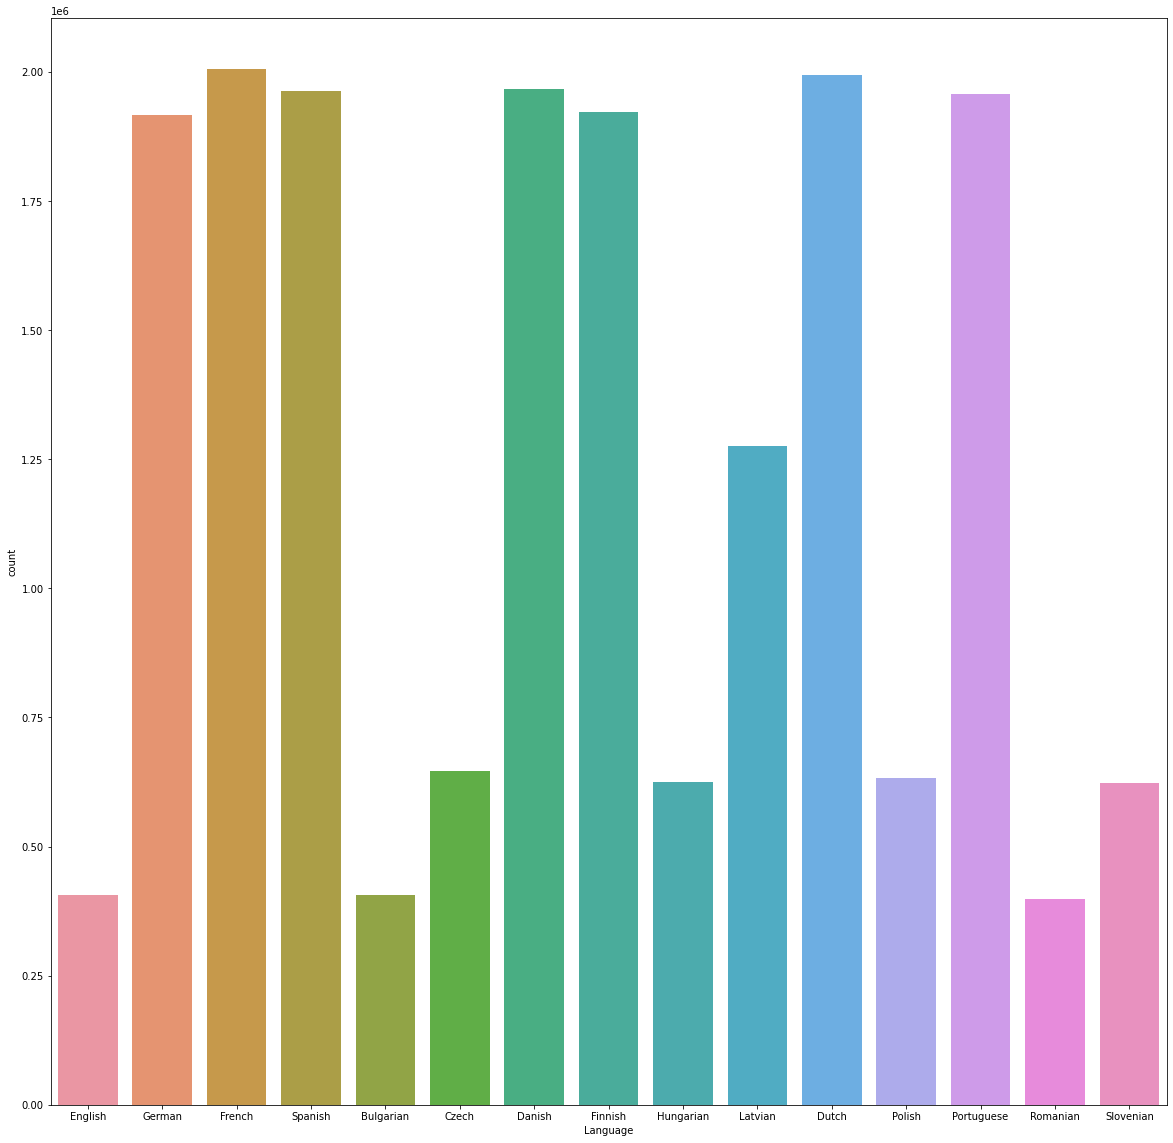

In [40]:
plt.figure(figsize=(20,20))
sns.countplot(x = df['Language'], data=df)

## Spliting the Dataset for training

In [48]:
x = df.iloc[:,0] # Independent Variable
y = df.iloc[:,1] # Dependent Variable

In [49]:
y.head()

0    English
1    English
2    English
3    English
4    English
Name: Language, dtype: object

In [50]:
x.head()

0                 membership of parliament see minutes
1    approval of minutes of previous sitting see mi...
2                 membership of parliament see minutes
3              verification of credentials see minutes
4                       documents received see minutes
Name: Text, dtype: object

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Applying TF-IDF Vectorizer

In [53]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')
# x = vectorizer.fit_transform(df['Text'])

In [54]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [56]:
pipe_mnb.fit(x_train, y_train)


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\b\w\w+\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)


In [59]:
pipe_lr = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('lr_clf', LogisticRegression())
])

In [57]:
pipe_lr.fit(x_train, y_train)


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\b\w\w+\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lr_clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sc

## Using Logistic Regression

In [58]:
lr_predicted = pipe_lr.predict(x_test)

## Model Evaluation

In [60]:
lr_acc = (metrics.accuracy_score(y_test, lr_predicted))*100
print('The logistic regression has:',lr_acc,'% accuracy')

The logistic regression has: 92.3482703092898 % accuracy


## Using Multinomial NB

In [ ]:
mnb_predicted = pipe_mnb.predict(x_test)

## Model Evaluation

In [61]:
mnb_acc = (metrics.accuracy_score(y_test, mnb_predicted))*100
print('The MultinomialNB has :',mnb_acc,'% accuracy')

The MultinomialNB has : 92.0262091176634 % accuracy


## Matrix Logistic Regression

In [62]:
matrix = metrics.confusion_matrix(y_test, lr_predicted)
print('Confusion matrix: \n', matrix)


Confusion matrix: 
 [[1083    0    0    0   40    1    4   10    1    1    7    2   65    2
     0]
 [ 108 1125    0    0   14    0    3    2    1    0    3    1   19    3
     0]
 [   1    0 1240    0    1    0    0    0    0    0    1    0    1    0
     0]
 [   0    0    0 1177    2    0    0    0    0    1    1    0    0    1
     0]
 [ 178    0    0    0  978    0    0    1    1    1    0    0    4    0
     0]
 [   3    1    1    0    1 1222    0    0    0    1    0    0    0    1
     0]
 [   1    0    1    0    2    0 1183    0    0    0    0    0    1    0
     0]
 [   3    0    1    0    0    0    0 1217    0    1    1    0    0    0
     0]
 [  96    2    0    0   11    0    2    3 1040    0    6    0   14    0
     3]
 [ 107    0    0    0   10    0    2    0    2 1045    4    0   15    0
     1]
 [ 103    2    0    0   13    0    3    2    2    2 1104    0   18    2
     3]
 [   0    0    0    0    0    0    0    0    0    0    0 1139    1    2
     4]
 [ 227    0    0   

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Actual labels',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [64]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(matrix, classes = ['ENG', 'GER', 'FRA', 'ESP','BUL','CZ','DAN','FIN','HUN','LAT','DUTCH','POL','PRT','ROM','ROM','SLO'])